In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [ ]:
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (50000, 32, 32, 3)
X_test Shape:  (10000, 32, 32, 3)
y_train Shape:  (50000, 1)
y_test Shape:  (10000, 1)


In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

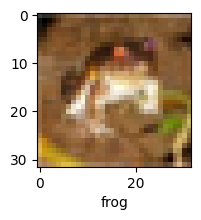

In [ ]:
plot_sample(X_train, y_train, 0)

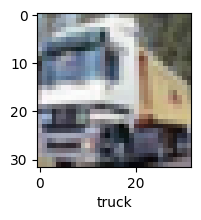

In [ ]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Training using CNN</h4>

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 4ms/step - loss: 1.4875 - accuracy: 0.4633
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1653 - accuracy: 0.5920
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0352 - accuracy: 0.6389
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9559 - accuracy: 0.6653
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8972 - accuracy: 0.6877
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8498 - accuracy: 0.7044
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8149 - accuracy: 0.7163
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7750 - accuracy: 0.7296
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7402 - accuracy: 0.7414
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.706

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9382 - accuracy: 0.6816


[0.9381975531578064, 0.6815999746322632]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.68      0.72      1000
           1       0.80      0.79      0.79      1000
           2       0.61      0.49      0.55      1000
           3       0.52      0.46      0.49      1000
           4       0.61      0.64      0.62      1000
           5       0.54      0.68      0.60      1000
           6       0.70      0.83      0.76      1000
           7       0.79      0.68      0.73      1000
           8       0.77      0.79      0.78      1000
           9       0.75      0.77      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.2417983e-04, 7.0417462e-07, 5.3947454e-04, 6.2016922e-01,
        1.1430586e-05, 3.7144154e-01, 6.7956862e-03, 4.1661706e-06,
        9.0864551e-04, 4.9936530e-06],
       [2.1057511e-03, 5.0916187e-03, 7.1833250e-09, 9.9462980e-08,
        5.5206804e-08, 2.7027638e-09, 7.8798457e-10, 7.2104456e-10,
        9.9016625e-01, 2.6362913e-03],
       [1.0774763e-02, 2.8016204e-02, 3.0226093e-03, 9.8738482e-04,
        3.9147455e-02, 1.1750308e-04, 2.0412500e-04, 2.2402888e-03,
        9.0103656e-01, 1.4453099e-02],
       [5.2986896e-01, 9.0642490e-05, 2.4812633e-01, 5.7927326e-05,
        8.9354680e-06, 2.9539668e-05, 2.5980200e-03, 4.6210939e-06,
        2.1921381e-01, 1.1898107e-06],
       [3.9222448e-09, 9.2281298e-06, 2.9086052e-02, 1.4181826e-01,
        5.9924942e-01, 6.3179043e-04, 2.2920154e-01, 2.3606972e-06,
        1.2740047e-06, 6.0168333e-08]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

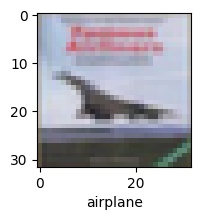

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import numpy as np

# Define varying hyperparameters
activation_functions = ['relu', 'tanh', 'sigmoid']
filter_options = [32, 64]
kernel_sizes = [(3, 3), (5, 5)]
stride_options = [(1, 1), (2, 2)]

# Create a list to store classification reports
classification_reports = []

# Loop over hyperparameters
for activation in activation_functions:
    for num_filters in filter_options:
        for kernel_size in kernel_sizes:
            for stride in stride_options:
                # Create a new CNN model
                cnn_model = models.Sequential([
                    layers.Conv2D(filters=num_filters, kernel_size=kernel_size, strides=stride, activation=activation, input_shape=(32, 32, 3)),
                    layers.MaxPooling2D((2, 2)),
                    layers.Conv2D(filters=num_filters, kernel_size=kernel_size, strides=stride, activation=activation),
                    layers.MaxPooling2D((2, 2)),
                    layers.Flatten(),
                    layers.Dense(64, activation=activation),
                    layers.Dense(10, activation='softmax')
                ])

                # Compile the model
                cnn_model.compile(optimizer='adam',
                                 loss='sparse_categorical_crossentropy',
                                 metrics=['accuracy'])

                # Train the model
                cnn_model.fit(X_train, y_train, epochs=10)

                # Evaluate on test data
                loss, accuracy = cnn_model.evaluate(X_test, y_test)
                print(f"Model with activation: {activation}, filters: {num_filters}, kernel: {kernel_size}, stride: {stride}")
                print("Test Accuracy:", accuracy)

                # Predict and calculate classification report
                y_pred = cnn_model.predict(X_test)
                y_pred_classes = [np.argmax(element) for element in y_pred]
                report = classification_report(y_test, y_pred_classes, output_dict=True)

                # Store classification report
                model_info = {
                    'activation': activation,
                    'filters': num_filters,
                    'kernel': kernel_size,
                    'stride': stride,
                    'report': report
                }
                classification_reports.append(model_info)

Epoch 1/10
1563/1563 [==============================] - 20s 5ms/step - loss: 1.4784 - accuracy: 0.4653
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1586 - accuracy: 0.5934
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0328 - accuracy: 0.6382
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9517 - accuracy: 0.6683
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8907 - accuracy: 0.6885
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8412 - accuracy: 0.7051
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7999 - accuracy: 0.7205
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7598 - accuracy: 0.7346
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7269 - accuracy: 0.7450
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.9197

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report
from tensorflow.keras import layers, models

# Define the combinations
combinations = [
    ("relu", 32, (3, 3), (1, 1)),
    ("relu", 64, (3, 3), (1, 1)),
    ("relu", 32, (5, 5), (1, 1)),
    ("relu", 32, (3, 3), (2, 2)),

    ("tanh", 32, (3, 3), (1, 1)),
    ("tanh", 64, (3, 3), (1, 1)),
    ("tanh", 32, (5, 5), (1, 1)),
    ("tanh", 32, (3, 3), (2, 2)),

    ("sigmoid", 32, (3, 3), (1, 1)),
    ("sigmoid", 64, (3, 3), (1, 1)),
    ("sigmoid", 32, (5, 5), (1, 1)),
    ("sigmoid", 32, (3, 3), (2, 2))
]

# Create a list to store classification reports
classification_reports = []

# Loop over combinations
for activation, num_filters, kernel_size, stride in combinations:
    # Create the CNN model
    cnn_model = models.Sequential([
        layers.Conv2D(filters=num_filters, kernel_size=kernel_size, strides=stride, activation=activation, input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters=num_filters, kernel_size=kernel_size, strides=stride, activation=activation),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation=activation),
        layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    cnn_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

    # Train the model
    cnn_model.fit(X_train, y_train, epochs=10, verbose=0)

    # Evaluate on test data
    loss, accuracy = cnn_model.evaluate(X_test, y_test)
    print(f"Model with activation: {activation}, filters: {num_filters}, kernel: {kernel_size}, stride: {stride}")
    print("Test Accuracy:", accuracy)

    # Predict and calculate classification report
    y_pred = cnn_model.predict(X_test)
    y_pred_classes = [np.argmax(element) for element in y_pred]
    report = classification_report(y_test, y_pred_classes, output_dict=True)

    # Store classification report
    model_info = {
        'activation': activation,
        'filters': num_filters,
        'kernel': kernel_size,
        'stride': stride,
        'accuracy': accuracy,
        'report': report
    }
    classification_reports.append(model_info)

313/313 [==============================] - 1s 3ms/step - loss: 0.9710 - accuracy: 0.6801
Model with activation: relu, filters: 32, kernel: (3, 3), stride: (1, 1)
Test Accuracy: 0.6801000237464905
313/313 [==============================] - 1s 3ms/step - loss: 0.8894 - accuracy: 0.7103
Model with activation: relu, filters: 64, kernel: (3, 3), stride: (1, 1)
Test Accuracy: 0.7103000283241272
313/313 [==============================] - 1s 3ms/step - loss: 0.9233 - accuracy: 0.6853
Model with activation: relu, filters: 32, kernel: (5, 5), stride: (1, 1)
Test Accuracy: 0.6852999925613403
313/313 [==============================] - 1s 3ms/step - loss: 1.3957 - accuracy: 0.5017
Model with activation: relu, filters: 32, kernel: (3, 3), stride: (2, 2)
Test Accuracy: 0.5016999840736389
313/313 [==============================] - 1s 3ms/step - loss: 1.0751 - accuracy: 0.6542
Model with activation: tanh, filters: 32, kernel: (3, 3), stride: (1, 1)
Test Accuracy: 0.65420001745224
313/313 [=============

In [ ]:
print(classification_reports)

[{'activation': 'relu', 'filters': 32, 'kernel': (3, 3), 'stride': (1, 1), 'accuracy': 0.6801000237464905, 'report': {'0': {'precision': 0.6910569105691057, 'recall': 0.765, 'f1-score': 0.7261509254864736, 'support': 1000}, '1': {'precision': 0.7449781659388647, 'recall': 0.853, 'f1-score': 0.7953379953379952, 'support': 1000}, '2': {'precision': 0.5647948164146869, 'recall': 0.523, 'f1-score': 0.5430944963655244, 'support': 1000}, '3': {'precision': 0.5460440985732814, 'recall': 0.421, 'f1-score': 0.4754376058723885, 'support': 1000}, '4': {'precision': 0.6689576174112256, 'recall': 0.584, 'f1-score': 0.6235985050720768, 'support': 1000}, '5': {'precision': 0.651307596513076, 'recall': 0.523, 'f1-score': 0.5801442041042707, 'support': 1000}, '6': {'precision': 0.581081081081081, 'recall': 0.903, 'f1-score': 0.7071260767423649, 'support': 1000}, '7': {'precision': 0.7533401849948612, 'recall': 0.733, 'f1-score': 0.7430309173846934, 'support': 1000}, '8': {'precision': 0.802197802197802

In [ ]:
# Create a pandas DataFrame from the data
df = pd.DataFrame(classification_reports)

# Specify the order of columns
column_order = ["activation", "filters", "kernel", "stride", "accuracy"]

# Reorder columns in the DataFrame
df = df[column_order]

# Save DataFrame to Excel
excel_path = "classification_results.xlsx"
df.to_excel(excel_path, index=False)

print(f"Excel table saved to {excel_path}")

Excel table saved to classification_results.xlsx


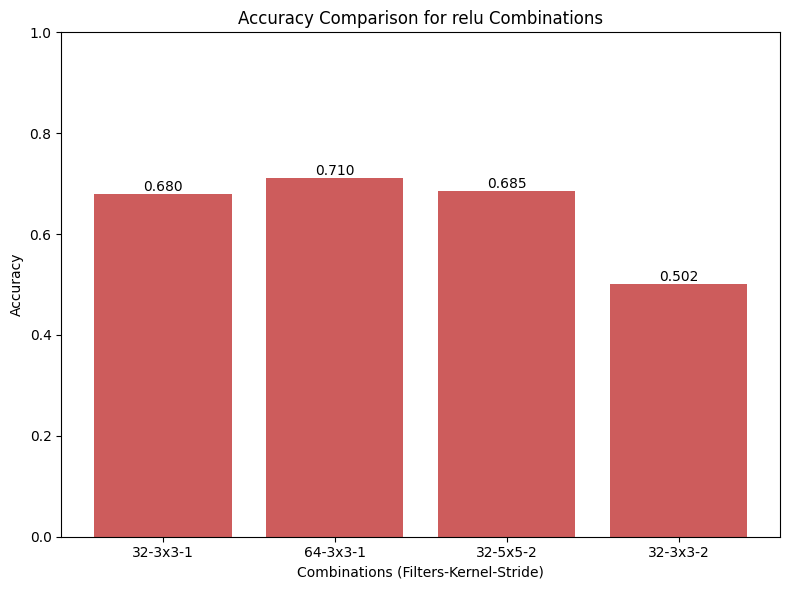

In [ ]:
import matplotlib.pyplot as plt

# Sample data for relu combinations (replace with your actual data)
relu_data = [
    (32, '3x3', 1, 0.680100024),
    (64, '3x3', 1, 0.710300028),
    (32, '5x5', 2, 0.685299993),
    (32, '3x3', 2, 0.501699984),
]

# Extract data for plotting
labels = [f"{item[0]}-{item[1]}-{item[2]}" for item in relu_data]
accuracies = [item[3] for item in relu_data]

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, accuracies, color='indianred')
plt.xlabel('Combinations (Filters-Kernel-Stride)')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for relu Combinations')
plt.xticks(rotation=0, ha="center")  # Center x-axis labels
plt.ylim(0, 1)  # Set y-axis limit

# Display accuracy values above each bar
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{accuracy:.3f}", ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


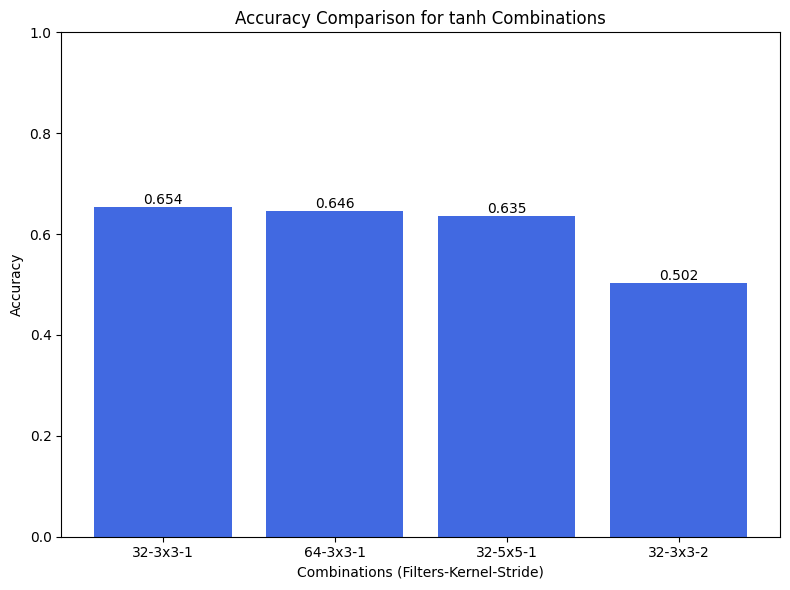

In [ ]:
import matplotlib.pyplot as plt

# Sample data for tanh combinations (replace with your actual data)
tanh_data = [
    (32, '3x3', 1, 0.654200017),
    (64, '3x3', 1, 0.645799994),
    (32, '5x5', 1, 0.635399997),
    (32, '3x3', 2, 0.502399981),
]

# Extract data for plotting
labels = [f"{item[0]}-{item[1]}-{item[2]}" for item in tanh_data]
accuracies = [item[3] for item in tanh_data]

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, accuracies, color='royalblue')
plt.xlabel('Combinations (Filters-Kernel-Stride)')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for tanh Combinations')
plt.xticks(rotation=0, ha="center")  # Center x-axis labels
plt.ylim(0, 1)  # Set y-axis limit

# Display accuracy values above each bar
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{accuracy:.3f}", ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


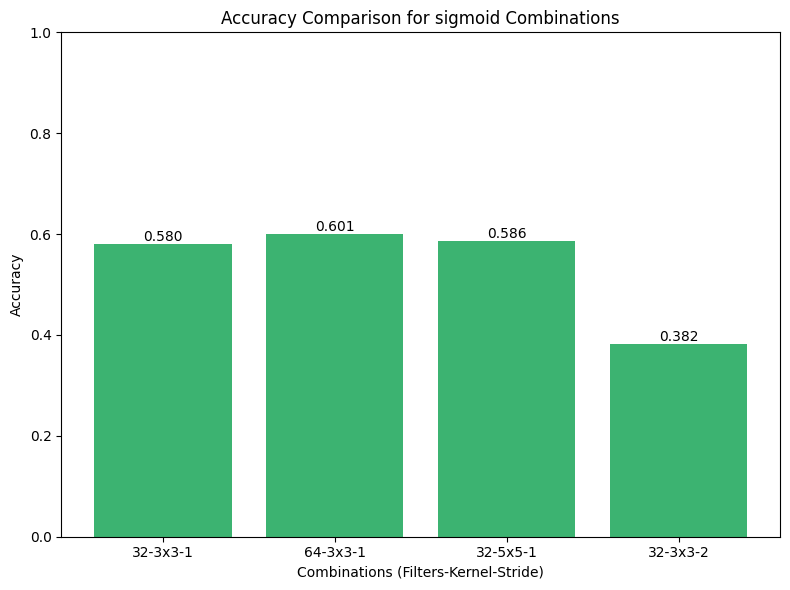

In [ ]:
import matplotlib.pyplot as plt

# Sample data for sigmoid combinations (replace with your actual data)
sigmoid_data = [
    (32, '3x3', 1, 0.57950002),
    (64, '3x3', 1, 0.600799978),
    (32, '5x5', 1, 0.586399972),
    (32, '3x3', 2, 0.381599993),
]

# Extract data for plotting
labels = [f"{item[0]}-{item[1]}-{item[2]}" for item in sigmoid_data]
accuracies = [item[3] for item in sigmoid_data]

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, accuracies, color='mediumseagreen')
plt.xlabel('Combinations (Filters-Kernel-Stride)')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for sigmoid Combinations')
plt.xticks(rotation=0, ha="center")  # Center x-axis labels
plt.ylim(0, 1)  # Set y-axis limit

# Display accuracy values above each bar
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{accuracy:.3f}", ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


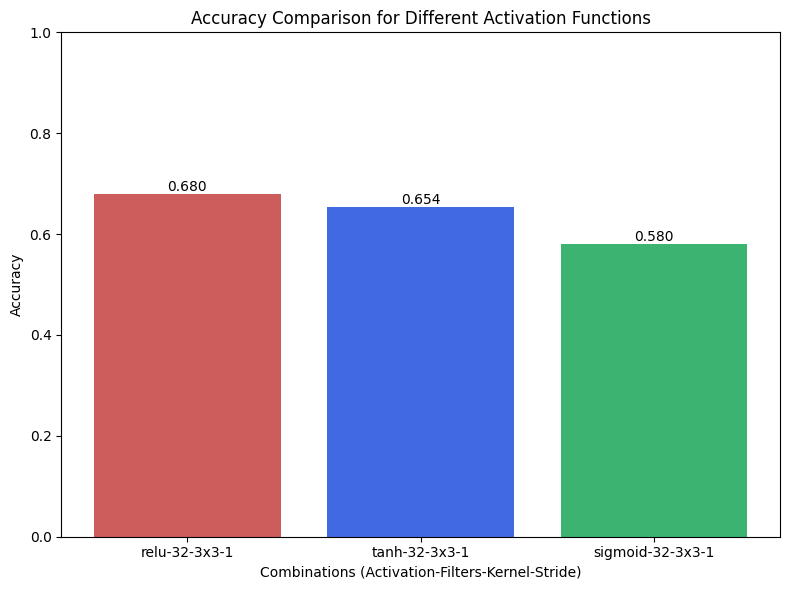

In [ ]:
import matplotlib.pyplot as plt

# Sample data for comparison (replace with your actual data)
comparison_data = [
    ("relu", 32, '3x3', 1, 0.680100024),
    ("tanh", 32, '3x3', 1, 0.654200017),
    ("sigmoid", 32, '3x3', 1, 0.57950002),
]

# Extract data for plotting
labels = [f"{item[0]}-{item[1]}-{item[2]}-{item[3]}" for item in comparison_data]
accuracies = [item[4] for item in comparison_data]

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, accuracies, color=['indianred', 'royalblue', 'mediumseagreen'])
plt.xlabel('Combinations (Activation-Filters-Kernel-Stride)')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Different Activation Functions')
plt.xticks(rotation=0, ha="center")  # Center x-axis labels
plt.ylim(0, 1)  # Set y-axis limit

# Display accuracy values above each bar
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{accuracy:.3f}", ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
print(len(classification_reports))

12


In [ ]:
data=[]
for i in classification_reports:
    data.append({
        'activation': i['activation'],
        'filters': i['filters'],
        'kernel': i['kernel'],
        'stride': i['stride'],
        'accuracy': i['accuracy'],
        'macro avg precision': i['report']['macro avg']['precision'],
        'macro avg recall': i['report']['macro avg']['recall'],
        'macro avg f1-score': i['report']['macro avg']['f1-score']
    })

In [ ]:
print(data)

[{'activation': 'relu', 'filters': 32, 'kernel': (3, 3), 'stride': (1, 1), 'accuracy': 0.6801000237464905, 'macro avg precision': 0.6821940091875802, 'macro avg recall': 0.6800999999999999, 'macro avg f1-score': 0.6746925490902848}, {'activation': 'relu', 'filters': 64, 'kernel': (3, 3), 'stride': (1, 1), 'accuracy': 0.7103000283241272, 'macro avg precision': 0.7091159063993805, 'macro avg recall': 0.7102999999999999, 'macro avg f1-score': 0.7089352194641856}, {'activation': 'relu', 'filters': 32, 'kernel': (5, 5), 'stride': (1, 1), 'accuracy': 0.6852999925613403, 'macro avg precision': 0.6892423939928879, 'macro avg recall': 0.6853, 'macro avg f1-score': 0.6828732346616875}, {'activation': 'relu', 'filters': 32, 'kernel': (3, 3), 'stride': (2, 2), 'accuracy': 0.5016999840736389, 'macro avg precision': 0.5130054166114383, 'macro avg recall': 0.5017, 'macro avg f1-score': 0.5042673568632962}, {'activation': 'tanh', 'filters': 32, 'kernel': (3, 3), 'stride': (1, 1), 'accuracy': 0.6542000

In [ ]:
# Create a DataFrame
df = pd.DataFrame(data)

# Define column order for Excel
column_order = ['activation', 'filters', 'kernel', 'stride', 'accuracy', 'macro avg precision', 'macro avg recall', 'macro avg f1-score']

# Reorder DataFrame columns
df = df[column_order]

# Save the DataFrame to an Excel file with headings
excel_filename = 'results.xlsx'
df.to_excel(excel_filename, index=False)